<a href="https://colab.research.google.com/github/tejasvarma-9/ML-end-sem-project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-7-3294405521.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


=== Random Forest - Train ===
MSE: 230944806752.26
RMSE: 480567.17
MAE: 346776.50
R²: 0.9313

=== Gradient Boosting - Train ===
MSE: 403469506473.58
RMSE: 635192.50
MAE: 480877.94
R²: 0.8799

=== Ensemble (RF + GB) - Train ===
MSE: 288670039097.85
RMSE: 537280.22
MAE: 405207.38
R²: 0.9141

=== Random Forest - Test ===
MSE: 1419050087995.22
RMSE: 1191238.89
MAE: 876963.36
R²: 0.6319

=== Gradient Boosting - Test ===
MSE: 1831911945499.73
RMSE: 1353481.42
MAE: 1047453.07
R²: 0.5247

=== Ensemble (RF + GB) - Test ===
MSE: 1517250714525.77
RMSE: 1231767.31
MAE: 954647.04
R²: 0.6064



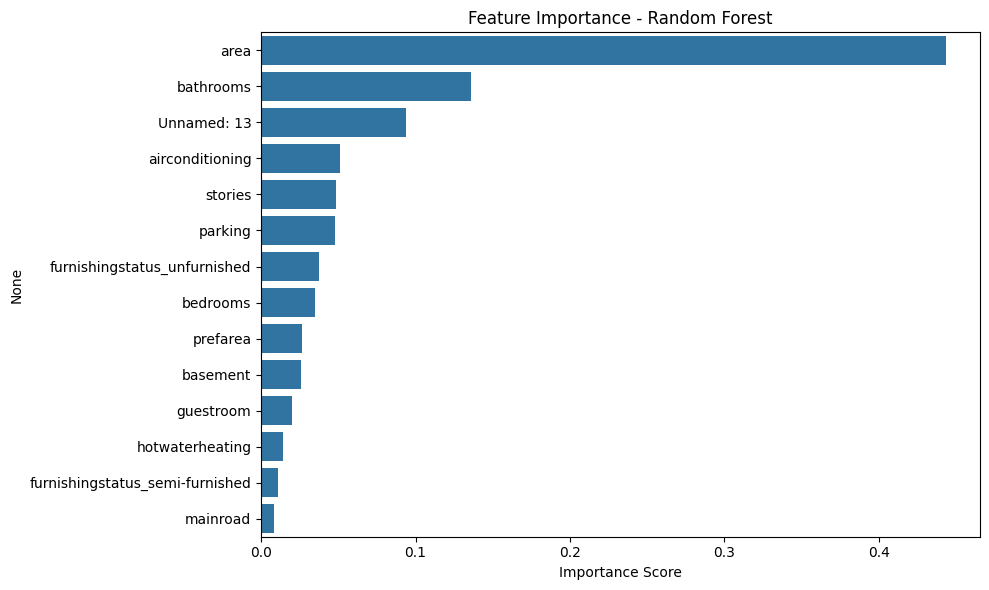

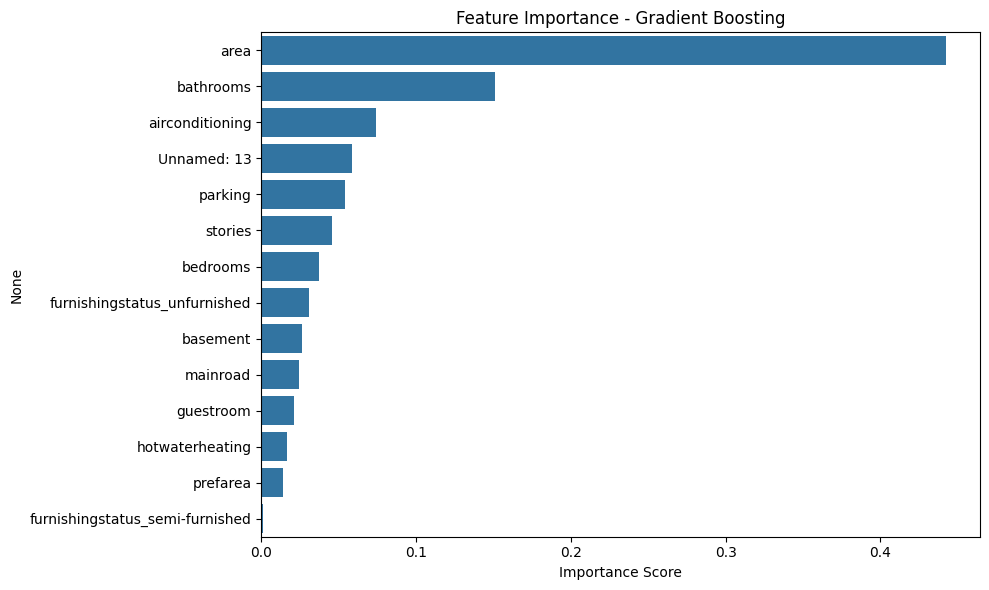

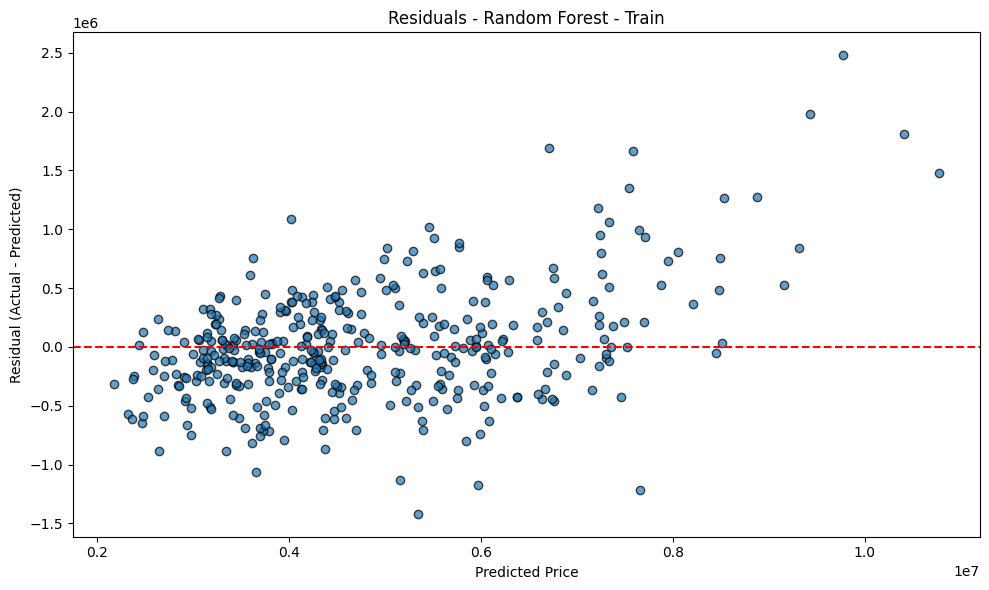

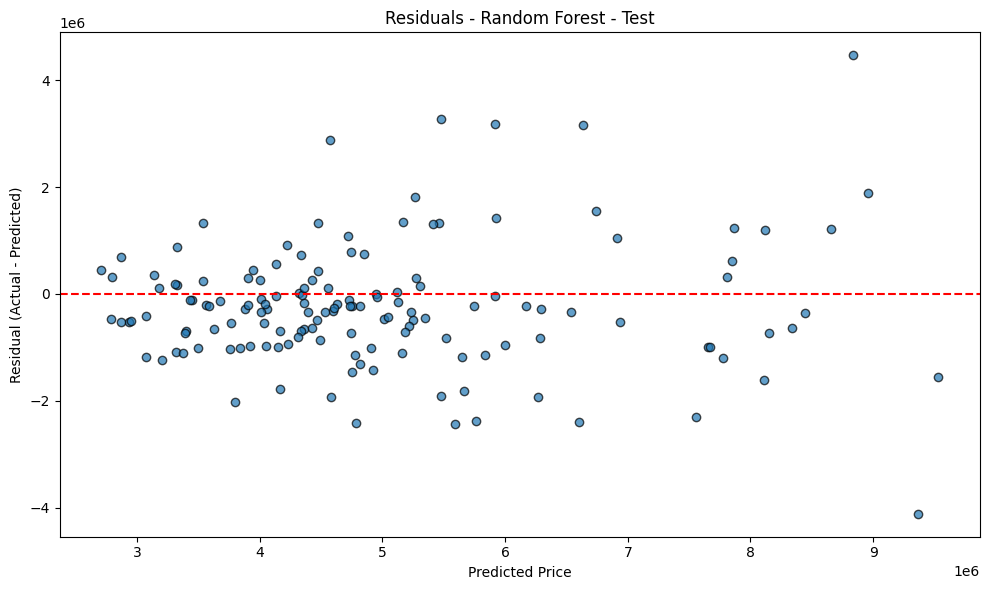

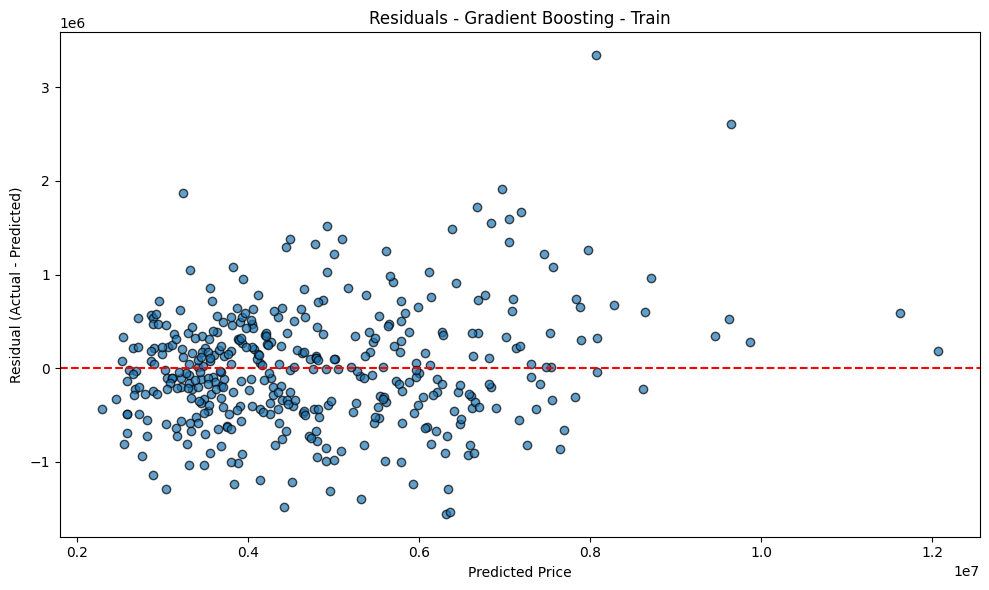

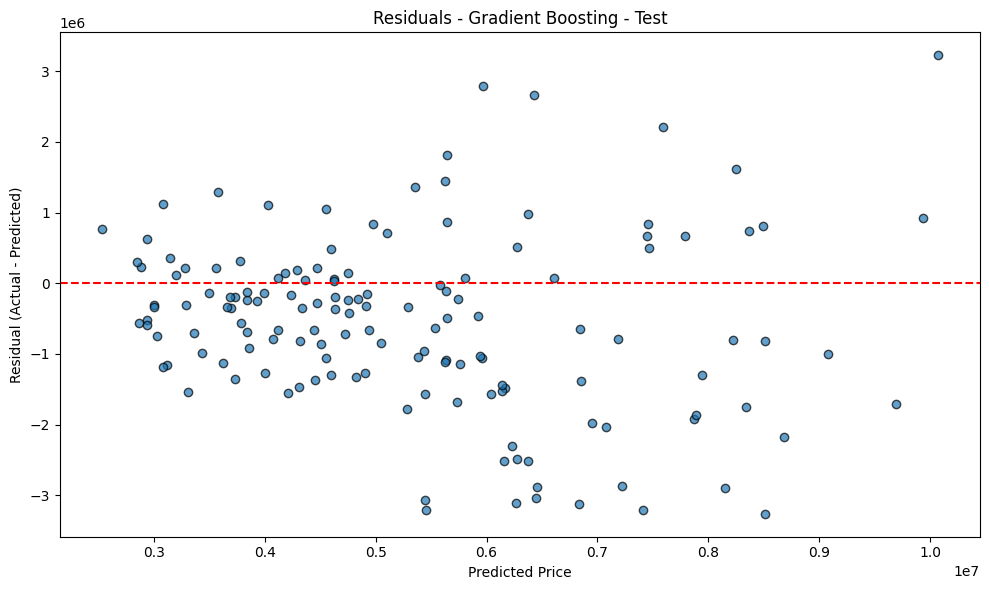

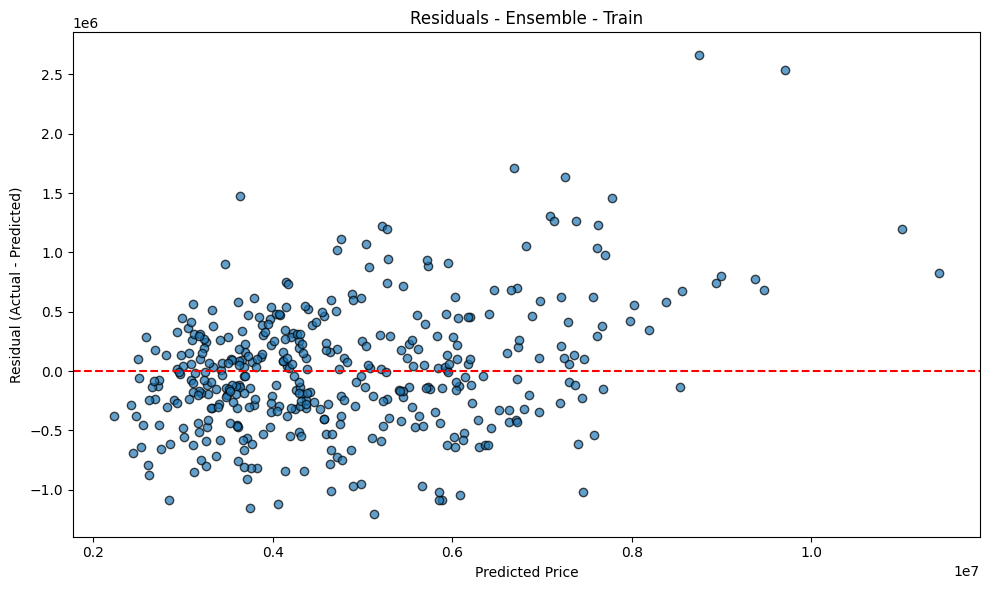

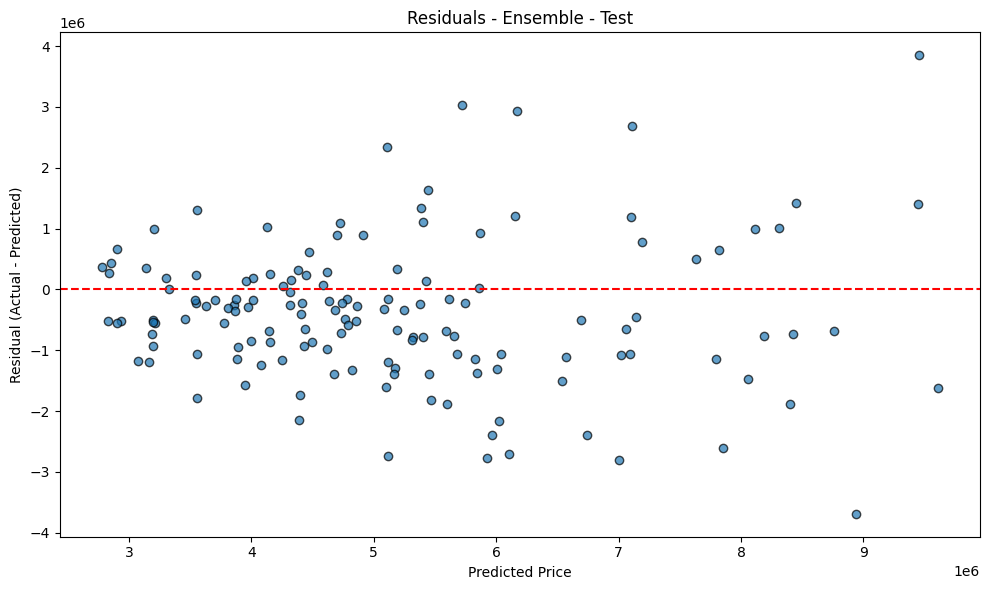

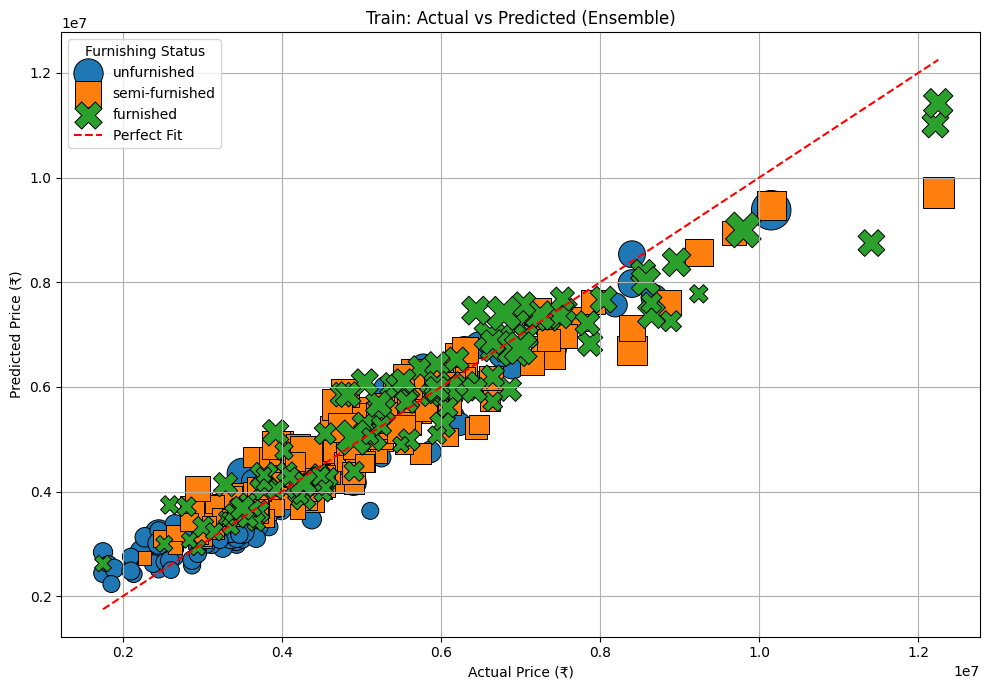

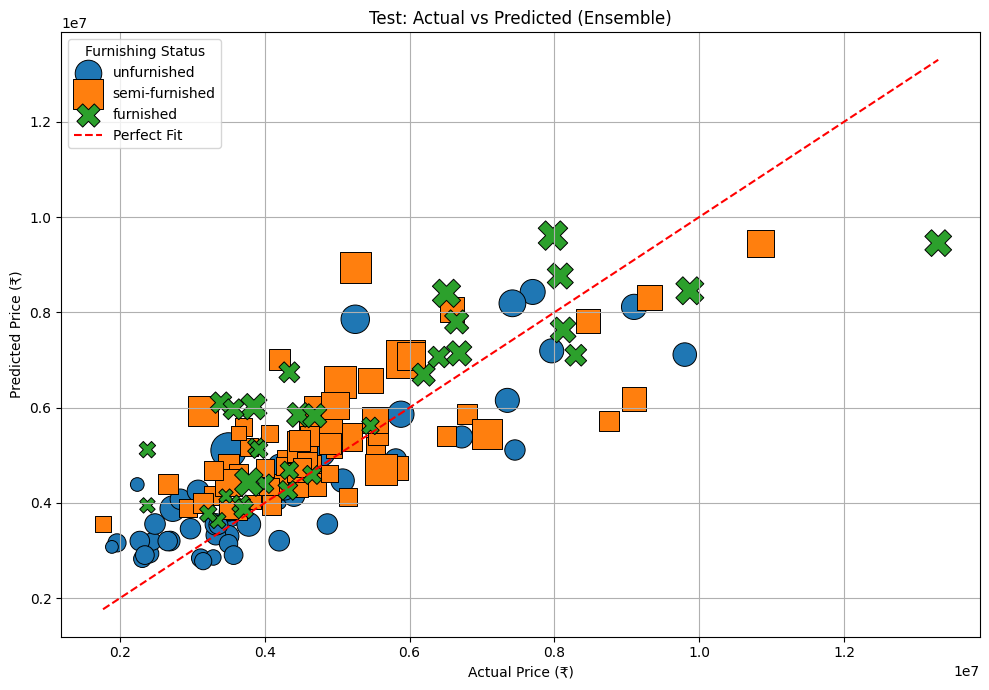

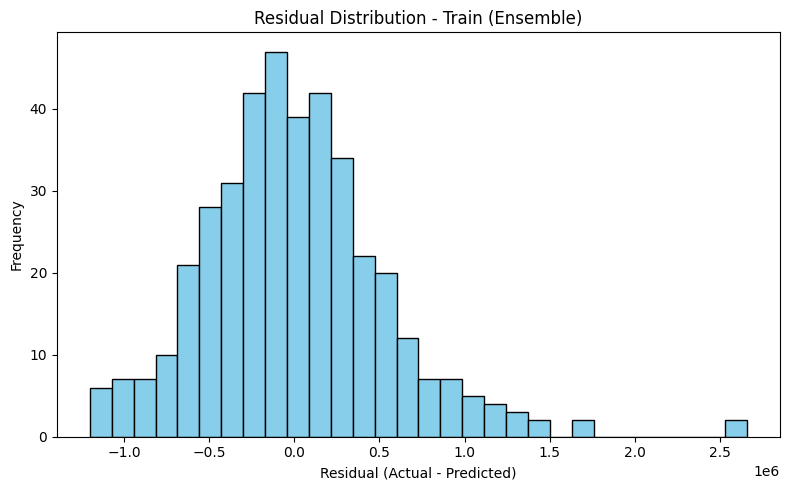

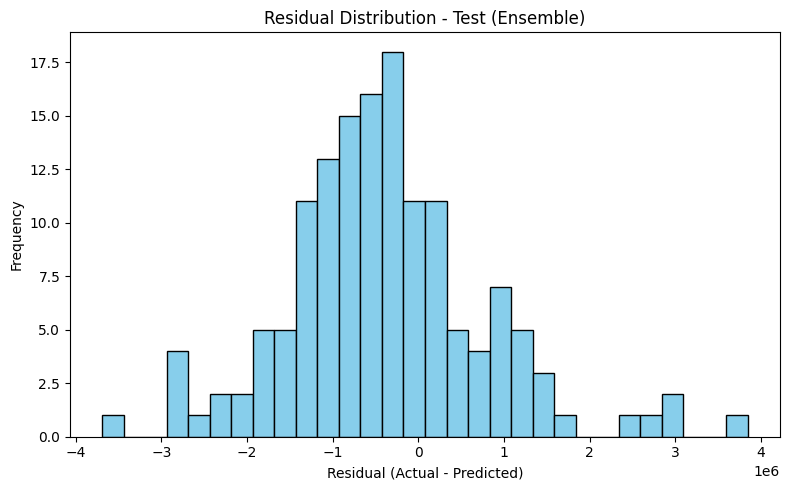

/tmp/ipython-input-7-3294405521.py:148: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})


=== XGBoost - Training Data ===
MAE: ₹263,513.75
MSE: ₹130.18 billion
RMSE: ₹360,797.84
R² Score: 0.9613


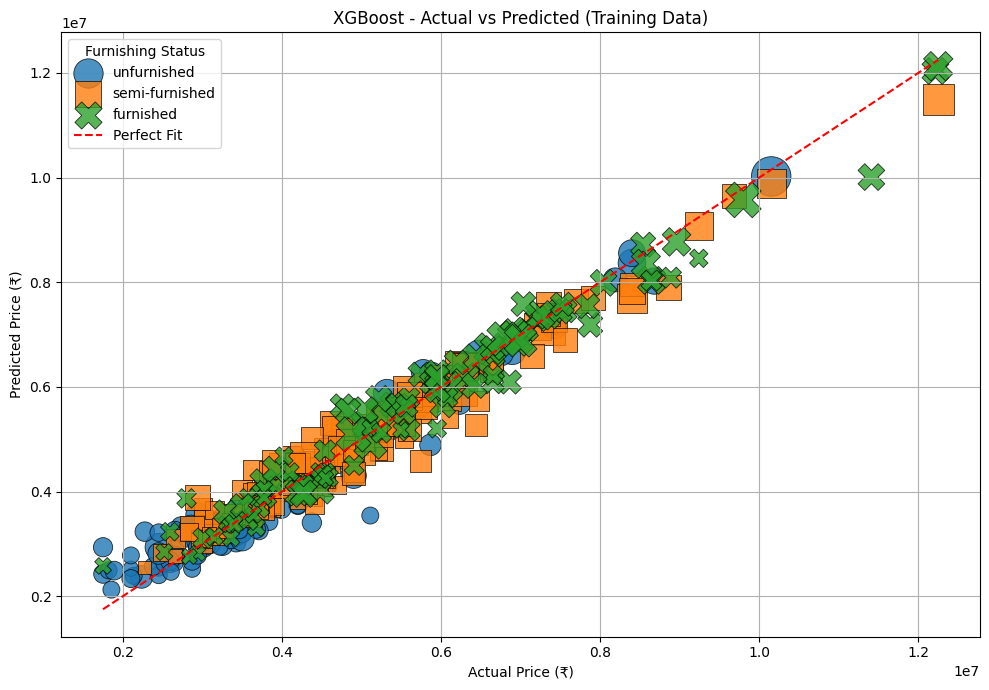

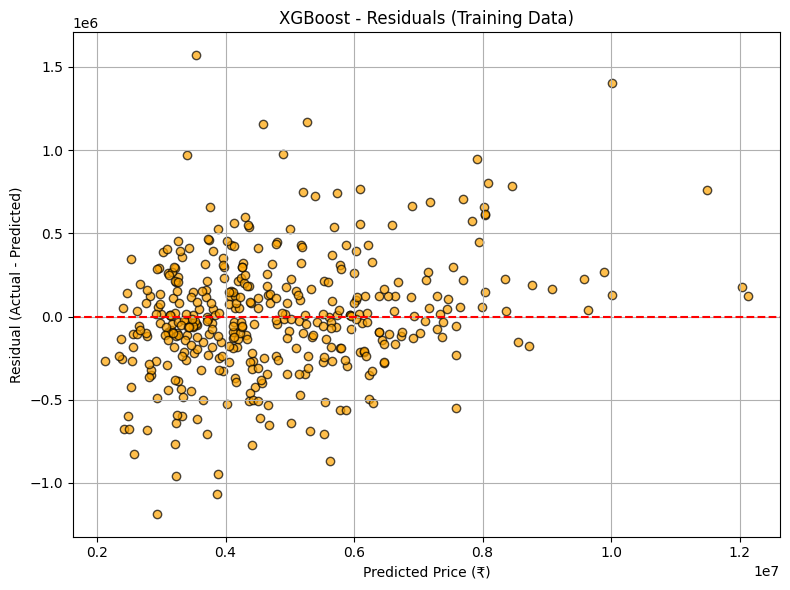

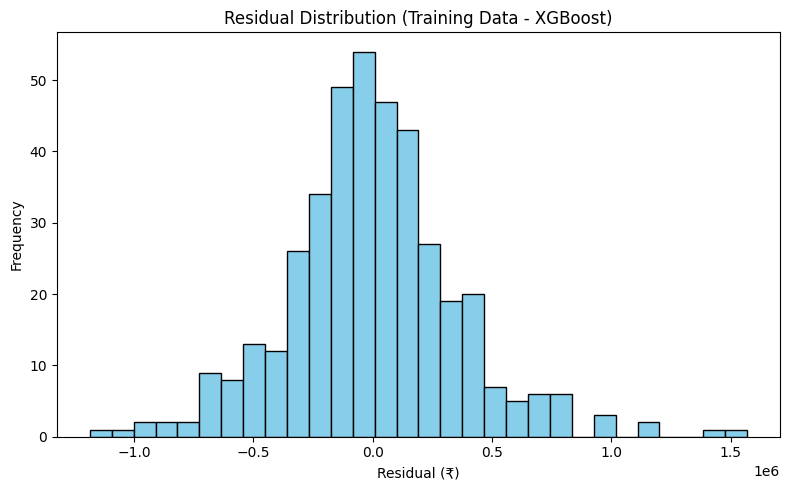


=== Residual-Corrected XGBoost Predictions on Test Data ===
MAE: ₹1,157,630.62
MSE: ₹2256.33 billion
RMSE: ₹1,502,107.31
R² Score: 0.4146


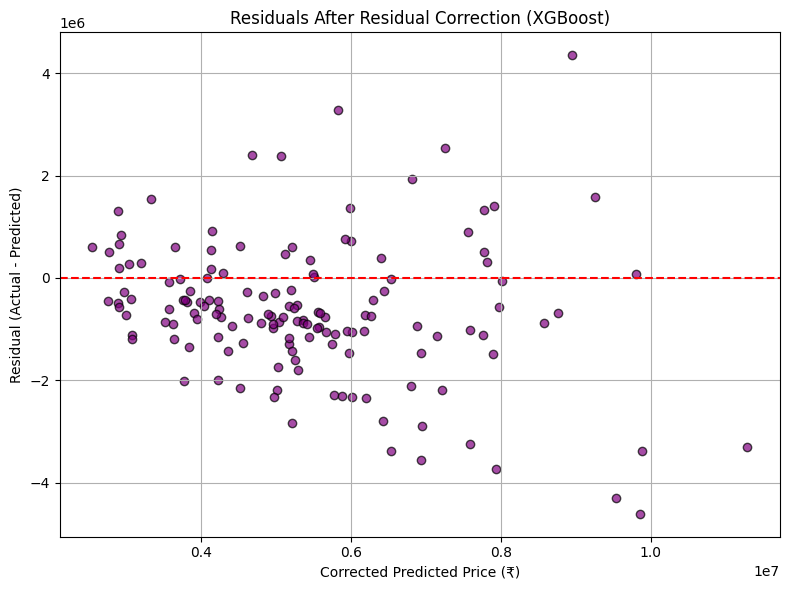

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("Housing2.csv")

# Encode binary yes/no columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})

# Store for plotting later
furn_status_full = df['furnishingstatus']
area_full = df['area']

# One-hot encode furnishing status
df_encoded = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Split features and target
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Train-Test Split: First 400 for training, rest for testing
X_train, y_train = X.iloc[:400], y.iloc[:400]
X_test, y_test = X.iloc[400:], y.iloc[400:]
furn_train = furn_status_full.iloc[:400]
furn_test = furn_status_full.iloc[400:]
area_train = area_full.iloc[:400]
area_test = area_full.iloc[400:]

# === Model Training ===
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

gb_model = GradientBoostingRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_train_pred = gb_model.predict(X_train)
gb_test_pred = gb_model.predict(X_test)

ensemble_train = (rf_train_pred + gb_train_pred) / 2
ensemble_test = (rf_test_pred + gb_test_pred) / 2

# === Evaluation ===
def evaluate_model(name, actual, predicted):
    print(f"=== {name} ===")
    print(f"MSE: {mean_squared_error(actual, predicted):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(actual, predicted)):.2f}")
    print(f"MAE: {mean_absolute_error(actual, predicted):.2f}")
    print(f"R²: {r2_score(actual, predicted):.4f}\n")

evaluate_model("Random Forest - Train", y_train, rf_train_pred)
evaluate_model("Gradient Boosting - Train", y_train, gb_train_pred)
evaluate_model("Ensemble (RF + GB) - Train", y_train, ensemble_train)

evaluate_model("Random Forest - Test", y_test, rf_test_pred)
evaluate_model("Gradient Boosting - Test", y_test, gb_test_pred)
evaluate_model("Ensemble (RF + GB) - Test", y_test, ensemble_test)

# === Feature Importance Plots ===
def plot_importance(importances, model_name):
    sorted_imp = importances.sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=sorted_imp.values, y=sorted_imp.index)
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

plot_importance(pd.Series(rf_model.feature_importances_, index=X.columns), "Random Forest")
plot_importance(pd.Series(gb_model.feature_importances_, index=X.columns), "Gradient Boosting")

# === Residual Plots ===
def plot_residuals(actual, pred, title):
    residuals = actual - pred
    plt.figure(figsize=(10, 6))
    plt.scatter(pred, residuals, alpha=0.7, edgecolors='k')
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f"Residuals - {title}")
    plt.xlabel("Predicted Price")
    plt.ylabel("Residual (Actual - Predicted)")
    plt.tight_layout()
    plt.show()

plot_residuals(y_train, rf_train_pred, "Random Forest - Train")
plot_residuals(y_test, rf_test_pred, "Random Forest - Test")
plot_residuals(y_train, gb_train_pred, "Gradient Boosting - Train")
plot_residuals(y_test, gb_test_pred, "Gradient Boosting - Test")
plot_residuals(y_train, ensemble_train, "Ensemble - Train")
plot_residuals(y_test, ensemble_test, "Ensemble - Test")

# === Actual vs Predicted with Size and Furnishing Markers ===
def plot_actual_vs_predicted(actual, predicted, area, status, title):
    marker_map = {'unfurnished': 'o', 'semi-furnished': 's', 'furnished': 'X'}
    color_map = {'unfurnished': '#1f77b4', 'semi-furnished': '#ff7f0e', 'furnished': '#2ca02c'}

    plt.figure(figsize=(10, 7))
    for furn in marker_map:
        mask = status == furn
        plt.scatter(
            actual[mask], predicted[mask],
            s=area[mask]/20, c=color_map[furn],
            marker=marker_map[furn], edgecolors='black', linewidths=0.7, label=furn
        )
    min_val, max_val = min(actual.min(), predicted.min()), max(actual.max(), predicted.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit')
    plt.title(title)
    plt.xlabel("Actual Price (₹)")
    plt.ylabel("Predicted Price (₹)")
    plt.legend(title="Furnishing Status")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_actual_vs_predicted(y_train, ensemble_train, area_train, furn_train, "Train: Actual vs Predicted (Ensemble)")
plot_actual_vs_predicted(y_test, ensemble_test, area_test, furn_test, "Test: Actual vs Predicted (Ensemble)")

# === Histogram of Residuals ===
def plot_residual_distribution(actual, predicted, title):
    residuals = actual - predicted
    plt.figure(figsize=(8, 5))
    plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Residual Distribution - {title}")
    plt.xlabel("Residual (Actual - Predicted)")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

plot_residual_distribution(y_train, ensemble_train, "Train (Ensemble)")
plot_residual_distribution(y_test, ensemble_test, "Test (Ensemble)")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

# Load dataset
df = pd.read_csv("Housing2.csv")

# Encode binary columns
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].replace({'yes': 1, 'no': 0})

# Preserve categorical and size info for plotting
furnishing_status = df['furnishingstatus']
area_sqft = df['area']

# One-hot encode furnishing status
df_encoded = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

# Split into X and y
X = df_encoded.drop(columns=['price'])
y = df_encoded['price']

# Split manually: first 400 rows for training, rest for testing
X_train, X_test = X.iloc[:400], X.iloc[400:]
y_train, y_test = y.iloc[:400], y.iloc[400:]
area_train, area_test = area_sqft.iloc[:400], area_sqft.iloc[400:]
status_train, status_test = furnishing_status.iloc[:400], furnishing_status.iloc[400:]

# Train XGBoost model
xgb = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predict on training data
train_pred = xgb.predict(X_train)

# Metrics
mae = mean_absolute_error(y_train, train_pred)
mse = mean_squared_error(y_train, train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, train_pred)

print("=== XGBoost - Training Data ===")
print(f"MAE: ₹{mae:,.2f}")
print(f"MSE: ₹{mse/1e9:.2f} billion")
print(f"RMSE: ₹{rmse:,.2f}")
print(f"R² Score: {r2:.4f}")

# Residuals
residuals = y_train - train_pred

# Plot Actual vs Predicted
marker_map = {'unfurnished': 'o', 'semi-furnished': 's', 'furnished': 'X'}
color_map = {'unfurnished': '#1f77b4', 'semi-furnished': '#ff7f0e', 'furnished': '#2ca02c'}

plt.figure(figsize=(10, 7))
for furn in marker_map:
    mask = status_train == furn
    plt.scatter(
        y_train[mask],
        train_pred[mask],
        s=area_train[mask] / 20,
        c=color_map[furn],
        marker=marker_map[furn],
        edgecolors='k',
        linewidths=0.6,
        alpha=0.8,
        label=furn
    )

min_val = min(y_train.min(), train_pred.min())
max_val = max(y_train.max(), train_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Fit')

plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("XGBoost - Actual vs Predicted (Training Data)")
plt.legend(title="Furnishing Status")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(train_pred, residuals, alpha=0.7, c='orange', edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price (₹)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("XGBoost - Residuals (Training Data)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram of Residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.title("Residual Distribution (Training Data - XGBoost)")
plt.xlabel("Residual (₹)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# === Residual Modeling on High-Error Cases ===

# Step 1: Calculate residuals on training data
train_residuals = y_train - train_pred
abs_errors = train_residuals.abs()

# Step 2: Select top 20% high-error samples
threshold = abs_errors.quantile(0.80)
high_error_mask = abs_errors >= threshold

X_high_error = X_train[high_error_mask]
residual_targets = train_residuals[high_error_mask]

# Step 3: Train residual model
residual_model = XGBRegressor(n_estimators=50, max_depth=3, learning_rate=0.1, random_state=42)
residual_model.fit(X_high_error, residual_targets)

# Step 4: Corrected Predictions (only applied on test set)
xgb_base_test_pred = xgb.predict(X_test)
residual_correction = residual_model.predict(X_test)
final_corrected_pred = xgb_base_test_pred + residual_correction

# === Evaluation of Corrected Model ===
print("\n=== Residual-Corrected XGBoost Predictions on Test Data ===")
print(f"MAE: ₹{mean_absolute_error(y_test, final_corrected_pred):,.2f}")
print(f"MSE: ₹{mean_squared_error(y_test, final_corrected_pred)/1e9:.2f} billion")
print(f"RMSE: ₹{np.sqrt(mean_squared_error(y_test, final_corrected_pred)):,.2f}")
print(f"R² Score: {r2_score(y_test, final_corrected_pred):.4f}")

# === Residual Plot (Corrected) ===
corrected_residuals = y_test - final_corrected_pred
plt.figure(figsize=(8, 6))
plt.scatter(final_corrected_pred, corrected_residuals, alpha=0.7, c='purple', edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Corrected Predicted Price (₹)")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals After Residual Correction (XGBoost)")
plt.tight_layout()
plt.grid(True)
plt.show()
